## Background and Context

- AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
Data Dictionary: Loan_Modelling.csvDownload Loan_Modelling.csv
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?



In [1]:
# Libraries to help load the data, manipulate the data and visualise the variables

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data 

loan_modelling = pd.read_csv(r"C:\Users\Admin\Documents\Loan_Modelling.csv")

loan_modelling


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
# To randomly view any 5 rows in the data

loan_modelling.sample(5,random_state =0)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
398,399,54,30,23,94608,2,0.4,1,0,0,0,0,0,0
3833,3834,33,9,83,93943,1,0.1,1,0,0,0,0,1,0
4836,4837,54,24,72,93943,3,1.4,3,218,0,0,0,0,1
4572,4573,32,7,81,95112,4,1.8,3,0,0,0,0,1,0
636,637,40,16,120,92037,2,6.1,1,196,0,0,0,1,0


In [4]:
# To know the dimension of the data

loan_modelling.shape

(5000, 14)

- There are 5000 rows and 14 columns in the data

In [5]:
# To know the data types

loan_modelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations**

- All columns have numeric variables; 1 float and 13 integers
- There is no categorical variable in the data
- The data ocuppies a memory space of 547KB.

In [6]:
# To check the duplication in the data

loan_modelling.duplicated().sum()

0

- There is no duplicated row in the data

In [7]:
# To check the missing values in the data

loan_modelling.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- There is no missing values in the data

In [8]:
# To check the descriptive statistics of the data and tranpose the result

loan_modelling.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observations**

- The ages of the customers vary from 23 to 67 years old with 45.3 years as the average 
- Their annual income varies from 8 to 224 thousnad dollars with 73.8 thousand dollars as the average annual income 
- The least educated customer is an undergraduate and the most educated has a professional education
- The customer with the least family size is 1 and the most has 4.
- There are customers with no house mortgage while the highest has mortgage value of 635 thousand dollars.


In [9]:
# To create a copy of the data

df =loan_modelling.copy()

# Visualisation



### Univariate plots

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

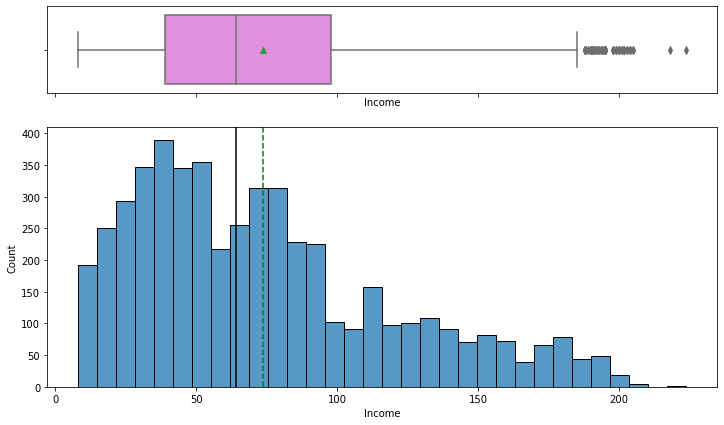

In [11]:
# Boxplot and histogram of the Income variable

histogram_boxplot(data = df, feature = "Income");

**Observations**

- The mean is greater than the median
- The mean and the median are very close
- The distribution is normal
- The outliers are due to the very high annual income of some of the  liability customers.

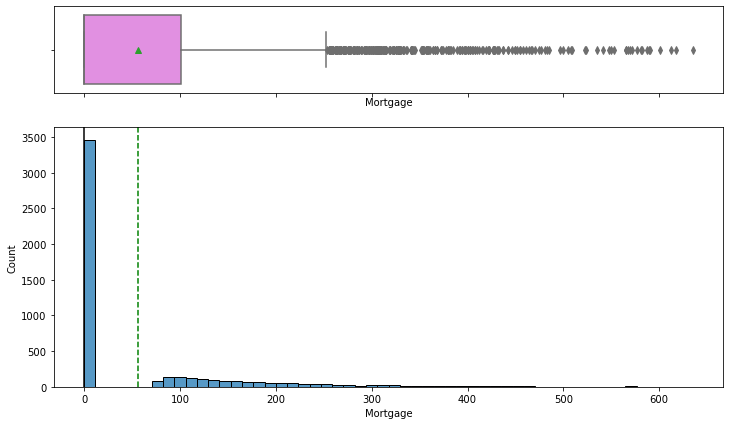

In [12]:
# # Boxplot and histogram of the Mortgage variable

histogram_boxplot(data = df, feature = "Mortgage");

**Observations**

- There are 3500 customers of AllLife bank without mortgage
- A Few of their customers have mortgage
- Few of them have very high values of mortgage, hence the outliers. 
- Owing to these outliers, the average mean of their mortgage is far greater than the median. This made the distribution to be right skewed.

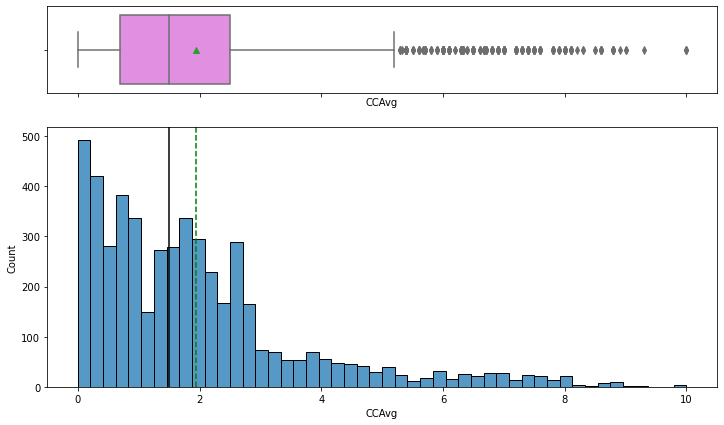

In [13]:
## Boxplot and histogram of the CCAvg variable

histogram_boxplot(data = df, feature = "CCAvg");

**Observations**

- Many customers have zero monthly average spending on their credit card
- Few customers have high monthly average spending on their credit card
- The outliers are due to these customers with high monthly average spending
- The mean is greater than the median
- The mean and the median are very close
- The distribution is normal

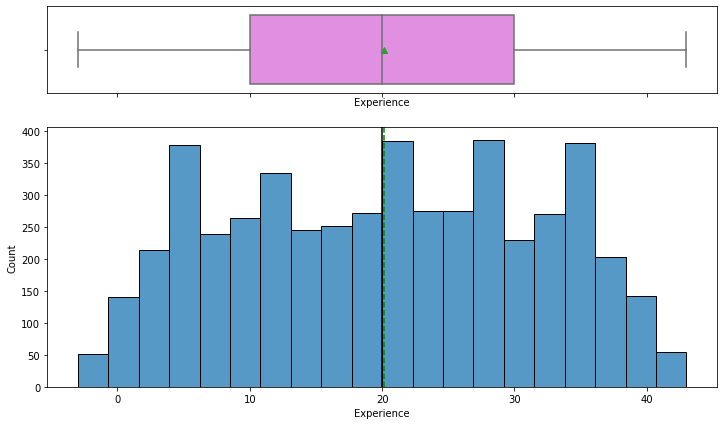

In [14]:
# Boxplot and histogram of the Experience variable

histogram_boxplot(data = df, feature = "Experience");

**Observations**

- The distribution has the same mean and median
- The distribution is normal
- There customers with zero year of professional experience. 
- There are customers with over 40 years of professional experience.

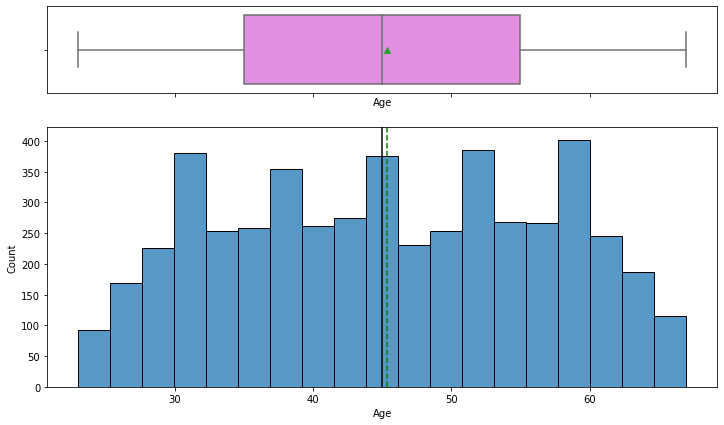

In [15]:
# Boxplot and histogram of the Age variable

histogram_boxplot(data = df, feature = "Age");

**Observations**

- Majority of their customers fall in the 30 and 60 age bracket. Meaning they are majorly working class people.
- The distribution has almost the same mean and median
- The distribution is normal
- They have few elderly or older customers who are over 65 years.
- They have less young customers who are less than 30 years in their books. Meaning, they have less high school students as customers.
- They do not have customers who are less than 18 years "Minors".

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

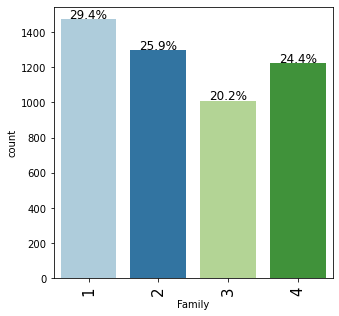

In [17]:
# Barplot of the family variable

labeled_barplot(data = df, feature = "Family", perc = True)

**Observations**

- The customers with the family size of 1 is the majority with 29.4%. There are 1,500 of them.
- 25.9% of these customers have family size of 2 and they are the second largest. They are 1,300 in number.
- 1,000 of their customers, representing 20.2%, have family size of 3, and they are the least.
- Their customers with the family size of 4 are 1,200 with the percentage of 24.4%

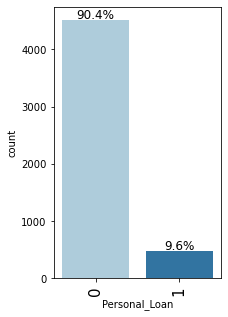

In [18]:
# Barplot of the Personal loan variable

labeled_barplot(data = df, feature = "Personal_Loan", perc = True)

**Observations**

- 4500 of their customers, representing 90.4% did not accept accept personal loan offer in the last campaign
- Only 500 representing 9.6% accepted the offer.

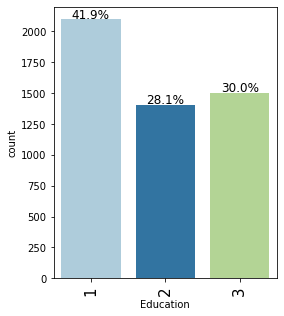

In [19]:
# Barplot of the Education variable

labeled_barplot(data = df, feature = "Education", perc = True)

**Observations**

- 41.9 of their customers are undergraduate
- 28.1% are graduate
- 30% of them have advanced education
- No illeterate among their customers

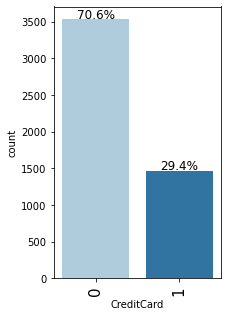

In [20]:
# Barplot of the CreditCard variable

labeled_barplot(data = df, feature = "CreditCard", perc = True)

**Observations**

- 70.6% of their customers do not have credit card on their accounts
- Only 29.4% does.


**Inferences**

- This 70.6% may be made up of the undergraduate and the graudate customers
- The 29.4% could be the customers with the advanced education. Since they have advanced education, they have more exposure
and hence understand the benefits of the credit card more.

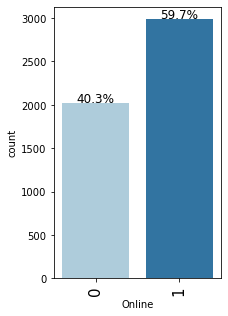

In [21]:
# Barplot of the Online variable

labeled_barplot(data = df, feature = "Online", perc = True)

**Observations**

- 59.7% of these customers have online account.
- 40.3%  of them do not.

**Inference**

- Since they have varied education, this helps majority of them to know how useful online account is

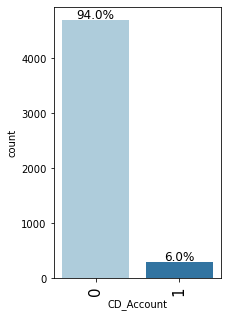

In [22]:
# Barplot of the CD_Account variable

labeled_barplot(data = df, feature = "CD_Account", perc = True)

**Observations**

- Despite their education, only 6% of them have deposit certificate on their investment. 
- This could also mean only 6% have investment on their deposit account since deposit certificate is usually issued to 
customers with investment with the bank.
- 94% of them do not have deposit certificate.

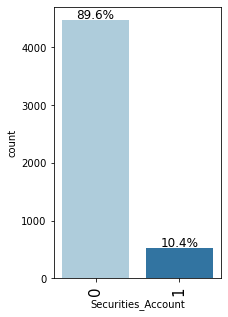

In [23]:
# Barplot of the Securities_Account variable

labeled_barplot(data = df, feature = "Securities_Account", perc = True)

**Observations**

- Only 10.4% have securities account like bonds or stocks with the bank
- 89.6% of them do not.

**Inference**
- Their customers have less interest in the securities market or less knowledge or education about it.

## Bivariate plots


### Correlation plot

In [24]:
# To know the correlation among the variables

df_mat = df.corr()
df_mat

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


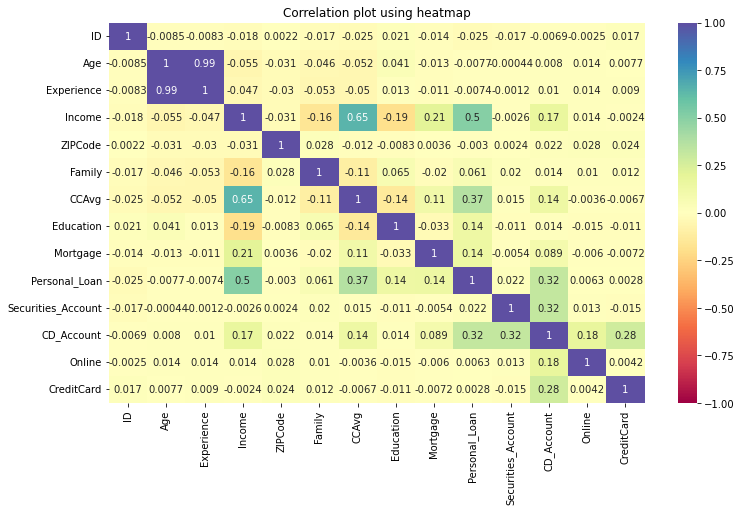

In [25]:
# To view the corrlation using heatman
plt.figure(figsize=(12,7))
sns.heatmap(data= df_mat, annot=True, vmin =-1, vmax =1, cmap="Spectral")
plt.title("Correlation plot using heatmap")
plt.show();

**Observations**

- The variables with moderate positive correlation with the personal loan are Income at 0.5, CCAvg at 0.38 and CD_Account 
at 0.32
- The variable with little positive correlation with the target are Education at 0.14, family at 0.061 and mortgage at 0.093.
- Others show zero correlation, which means whatever changes in these variables does not affect the target variable.

**Note**

- Positive correlation means any positive change in these variables will bring about a positive change in the target variable.

### Scatter plot

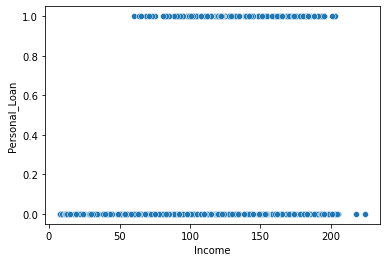

In [26]:
# Scatter plot of the target and the Income variable

sns.scatterplot(data = df, y = "Personal_Loan", x = "Income");

**Observations**

- Only customers with annual income of 50 thousand dollars and above were qualified to accept the personal loan offer during this campaign
- Customers with less than annual income were not qualified to accept.
- Also, the two customers with the highest annual income did not have the offer.

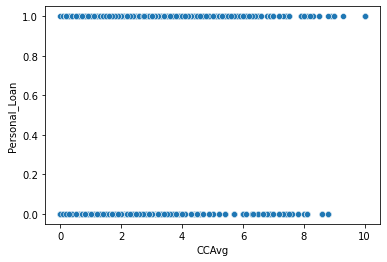

In [27]:
# Scatter plot of the target and the CCAvg variable

sns.scatterplot(data = df, y = "Personal_Loan", x = "CCAvg");

**Observation**

- All the customers, regardless of the monthly average spending on credit card, were qualified to accept the personal loan offer during this campaign.

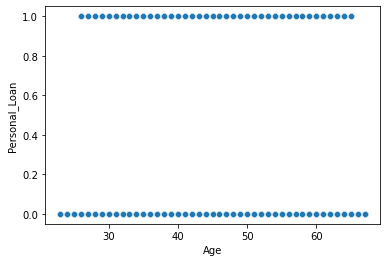

In [28]:
# Scatter plot of the target and the Age variable

sns.scatterplot(data = df, y = "Personal_Loan", x = "Age");

**Observations**

- All the customers from age 26 years were qualified to accept the personal loan offer during this campaign.
- The customers with age less than 26 and age more than 65 years were not qualified to accept the offer.
- The age bracket considered during this campaign was between 26 and 65 years and they were all qualified to accept the offer.

In [29]:
# The descriptive statistics of the Age variable

df["Age"].describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

### Outliers Treatment

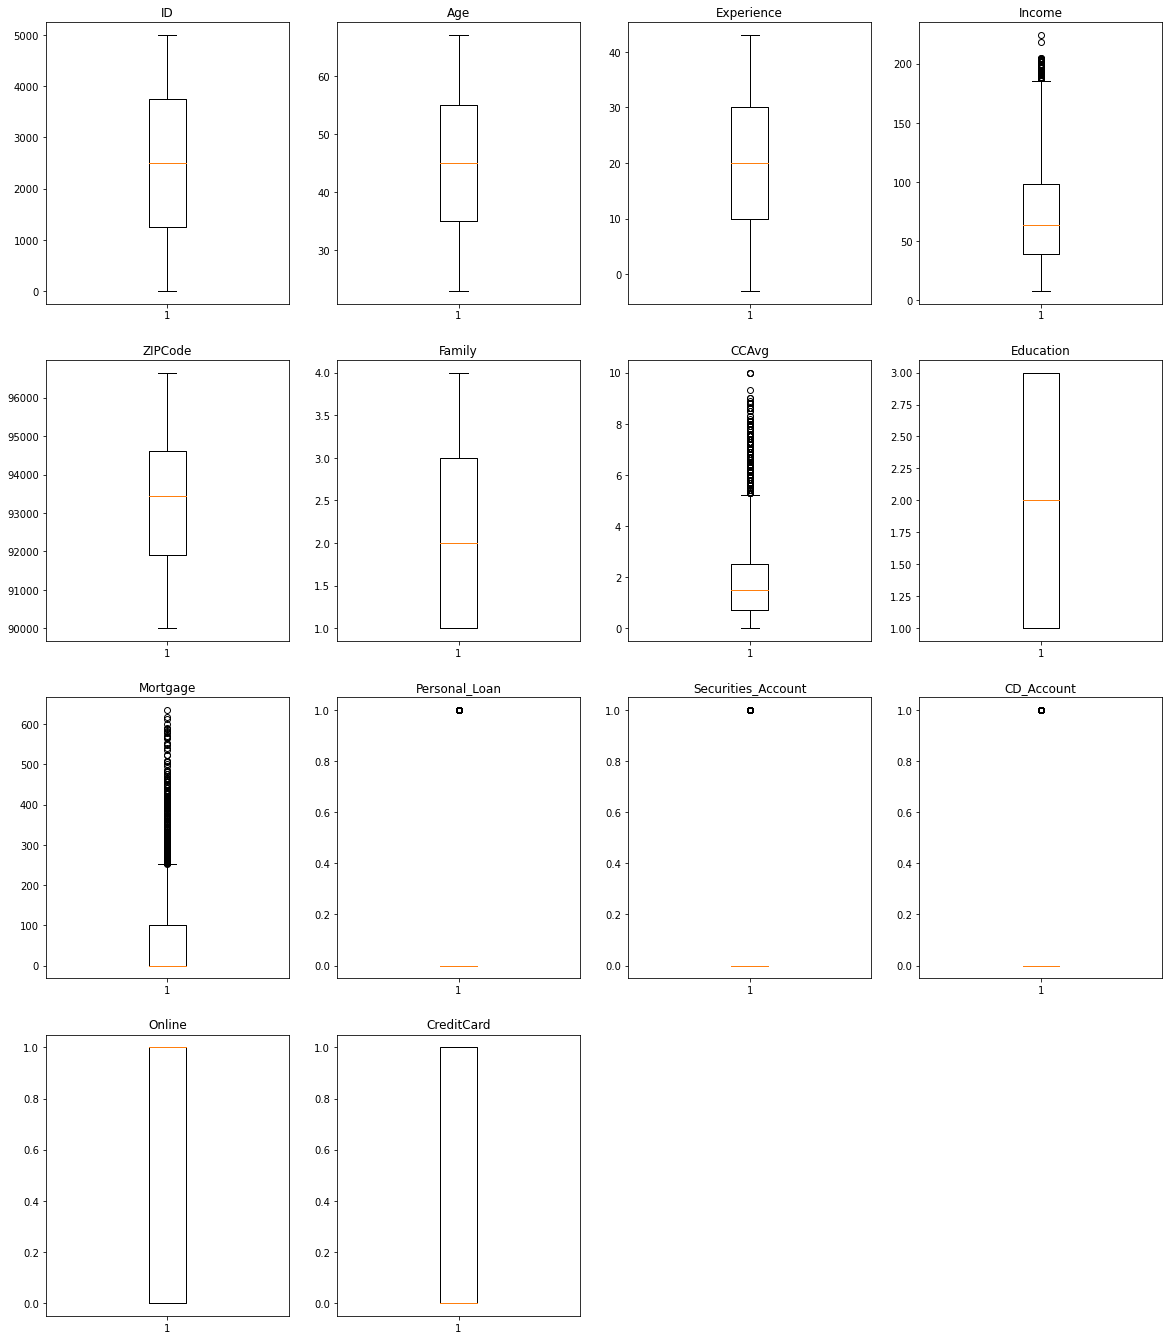

In [30]:
# outlier detection using boxplot

numeric_columns = df.select_dtypes(include=np.number)
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable])
#     plt.tight_layout()  # to avoid the title from overlapping
    plt.title(variable)

plt.show()

- There are 3 variables with the outliers - Income, Mortgage and CCAvg.

In [31]:
# Function to treat these outliers

def treat_outliers(df, col):
    """
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(
        df[col], Lower_Whisker, Upper_Whisker
    )  # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
    # and all the values above upper_whisker will be assigned value of upper_Whisker
    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [32]:
# treating the outliers
df_col = df[["Income", "CCAvg", "Mortgage"]]
df = treat_outliers_all(df, df_col)

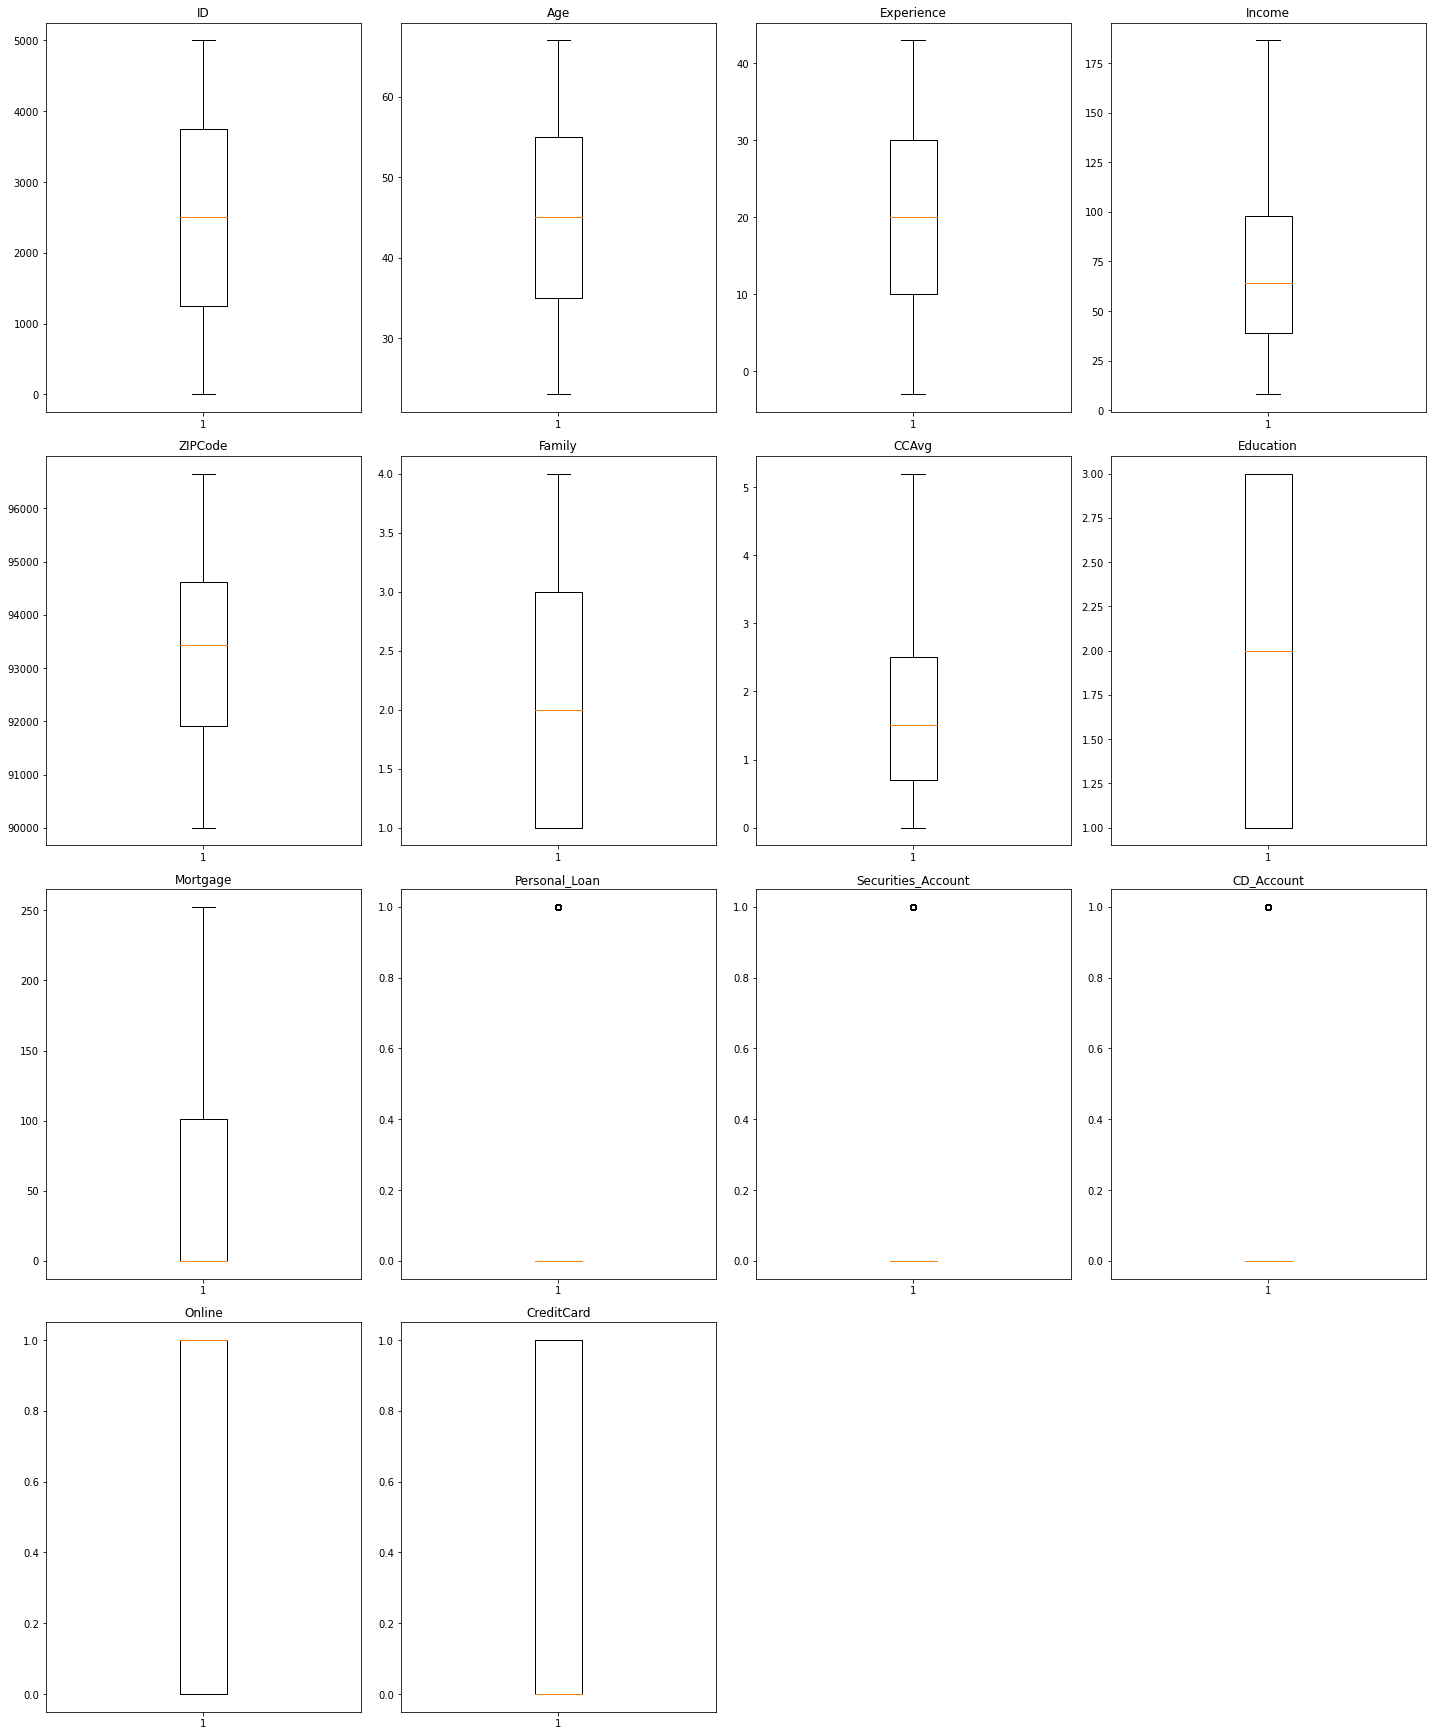

In [33]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- All outliers have been treated.

# To build the linear regression model

In [34]:
# To select the features and the target

X = df.drop("Personal_Loan", axis =1)
y = df["Personal_Loan"]

In [35]:
# To check the unique values of the target

df["Personal_Loan"].value_counts(normalize =True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

- 90% of these customers did not accept the loan offer in the last campaign
- Approximately 10% accepted the loan offer

In [36]:
# To check the dimension of the features

X.shape

(5000, 13)

- There are 5000 rows and 13 columns in the features

In [37]:
# libraries to help build Linear regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [38]:
# To split the data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0, stratify =y)


In [39]:
# To check the dimension of the training data

x_train.shape

(4000, 13)

- There are 4000 rows and 13 columns in the training data

In [40]:
# To check the unique values of the training data

y_train.value_counts()

0    3616
1     384
Name: Personal_Loan, dtype: int64

**Observations**

- The data is heavily inbalance
- 3,616 liability customers will not buy a personal loan
- 384 customers will buy.

In [41]:
# To instantiate the scaler

scaler = StandardScaler()

# To calculate and convert the variables to have a mean of 0 and standard deviation of 1

x_train_scaler = scaler.fit_transform(x_train)

x_test_scaler = scaler.transform(x_test)



In [42]:
# To confirm the transformation

x_train_scaler

array([[ 0.70923973, -0.63584409, -0.70397538, ..., -0.2487025 ,
        -1.19588196, -0.64842466],
       [-0.94406691, -1.33318492, -1.31404381, ..., -0.2487025 ,
        -1.19588196, -0.64842466],
       [-0.59132446,  1.71768123,  1.64914568, ..., -0.2487025 ,
        -1.19588196,  1.5421992 ],
       ...,
       [-1.04127939,  1.54334602,  1.64914568, ..., -0.2487025 ,
        -1.19588196, -0.64842466],
       [-0.31288012, -0.8973469 , -1.05258591, ..., -0.2487025 ,
        -1.19588196,  1.5421992 ],
       [-0.21775076, -1.33318492, -1.31404381, ..., -0.2487025 ,
         0.83620293, -0.64842466]])

In [43]:
# Create an instant of the logistics regression

logreg = LogisticRegression()

#To train or build the model

logreg.fit(x_train_scaler, y_train)

LogisticRegression()

In [44]:
# To enable the model to predict probability

logreg.predict(x_train_scaler)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
# function to compute different metrics to check performance of a classification model

def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
     # convert probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute accuracy
    recall = recall_score(target, pred_class)  # to compute recall
    precision = precision_score(target, pred_class)  # to compute precision
    f1 = f1_score(target, pred_class)  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],),
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf, fmt="g", annot=True)
    plt.ylabel("Actual Value")
    plt.xlabel("Predicted value")
    plt.show()

    return df_perf,

## To check the logistic model's training performance

In [46]:
# Libraries to help check the model performances

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve

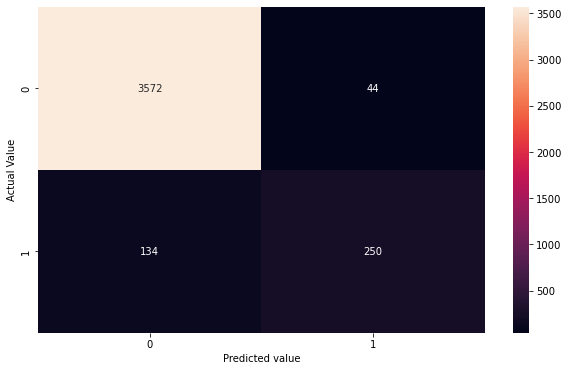

((   Accuracy    Recall  Precision  F1-score
  0    0.9555  0.651042    0.85034  0.737463,),)

In [47]:
# To check the training performance

df_train = model_performance_classification(logreg, x_train_scaler, y_train)

df_train

**Interpretations of the confusion matrix**

- From the liability customers who did not accept personal loan offer, 3,572 of them were correctly classified as not accepted the offer. This is refered to as the True Negative.
- 250 customers who accepted the personal loan offer were correctly classified that they accepted the offer. This is the True positive.
- 44 customers who did not buy the personal loan offer were wrongly classified that they did buy the offer. This is False Positive
- 134 liability customers who bought the loan offer were wrongly classified that they did not buy. This is the False Negative.

**Interpretations of the Metrics**

- The Accuracy score of 0.9555 means that the model 95.6% accurately predicted customers who accepted the personal loan offer
that they accepted the loan offer, and the customers who did not accept that they did not accept the loan offer.
- Recall score of 0.651042 means that, out of the customers who accepted the loan offer in the target training data, the model was able to classify 65% of them correctly.
- The precision score of 0.85034 means that, out of the customers that were predicted to accept the offer, the model was able 
to predict 85% of them correctly.
- F1 score of 0.737463 shows a balance of 74% between the recall and precision scores.

##  To check the logistic model's test performance

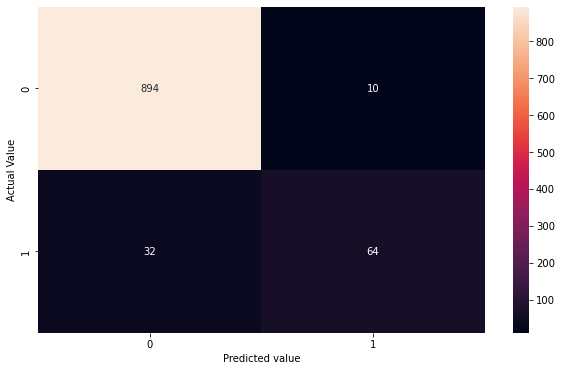

((   Accuracy    Recall  Precision  F1-score
  0     0.958  0.666667   0.864865  0.752941,),)

In [48]:
# To check the model testing performance

df_test = model_performance_classification(logreg, x_test_scaler, y_test)

df_test

**Interpretations of the confusion matrix**

- 894 customers who did not accept the loan offer in the target testing data were correctly classified that they did not accept the personal loan offer. This is the True Negative.
- 10 customers who did not accept the loan offer were wrongly classified that they did accept the offer. This is the False Positive.
-  customers who accepted the offer were correctly classified that they accepted the loan offer. This is the True Positive.
- 32 customers who accepted the loan offer were wrongly classified that they did not accept the offer. This is the False Negative.

**Interpretations of the Metrics**

- The Accuracy score of 0.958 means that the model 95.8% accurately predicted customers who accepted the personal loan offer 
in the testing data that they accepted the loan offer, and the customers who did not accept that they did not accept the loan 
offer.
- Recall score of 0.666667 means that, out of the customers who accepted the loan offer in the target testing data, the model
was able to classify 67% of them correctly.
- The precision score of 0.864865 means that, out of the customers that were predicted to accept the offer, the model was able 
to predict 86.5% of them correctly.
- F1 score of 0.752941 shows a balance of 75.3% between the recall and precision scores.

## Comparing the training and testing performances

- There is an improvement in all the metrics in the testing data performance.
- 32 as the False Negative in the confusion matrix of the testing data as against 134 in the training data. This is a massive
improvement in the area of error reduction.
- The True Negative of 10 in the confusion matrix of the testing data as against 44 in the training data.

# Conclusion on logistic regression model

- The model generalizes well both on the training and testing data.

# Any room for improvement?

- Since the target data is largely imbalance as 90% of the target are class 0 while the class 1 is just 10%. Data imbalance tends to make the accuracy score unnecessarily high and unreliable, hence effort will be made to improve either the recall score or the precision score.

In [49]:
# Rebuild the model by adjusting the percentage of the classes in the target

logreg1 = LogisticRegression(class_weight={0: 0.75, 1: 0.25}, random_state = 0)

# To fit the training data to the model

logreg1.fit(x_train_scaler, y_train)

LogisticRegression(class_weight={0: 0.75, 1: 0.25}, random_state=0)

# To check the model training performance

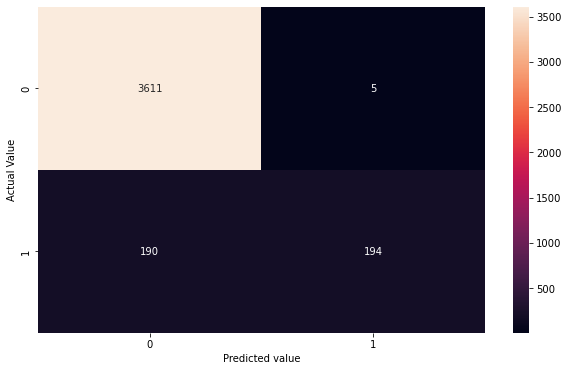

((   Accuracy    Recall  Precision  F1-score
  0   0.95125  0.505208   0.974874  0.665523,),)

In [50]:
# To check the model training performance

df_train3 = model_performance_classification(logreg1, x_train_scaler, y_train)

df_train3

**Interpretations**
 
- There is an improvement in precision score when compared to the logistic regression training performance above.
It increased to 97.5% from 85%. But there is reduction in the recall and the F1 scores.
- This model minimizes the False Positive to 5 from 44 in the logistic regression training performance. Hence, the improvement 
in the precision score to 97.5%.
- This means that the model wrongly classified that, 5 customers accepted the loan offer but they did not.
- The model did badly in the False Negative side, hence the reduction in the recall score to 50.5%
- The model wrongly classified 190 customers that they did not accept the offer but they did.

# To check the model testing performance

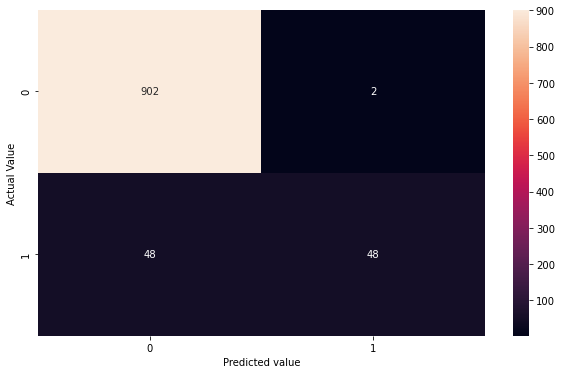

((   Accuracy  Recall  Precision  F1-score
  0      0.95     0.5       0.96  0.657534,),)

In [51]:
# To check the model test performance

df_test3 = model_performance_classification(logreg1, x_test_scaler, y_test)

df_test3

**Interpretations**
 
- There is an improvement in precision score when compared to the logistic regression test performance above.
It increased to 96%. But there is reduction in the recall and the F1 scores.
- This model minimizes the False Positive to 2. Hence, the improvement in the precision score to 96%.
- This means that the model wrongly classified that, 2 customers accepted the loan offer but they did not.
- The model did badly in the False Negative side, hence the reduction in the recall score to 50%
- The model wrongly classified 48 customers that they did not accept the offer but they did.

## Using Hyperparater Tunning for the Regularisation Strength of C in Logistic Regression Model

In [52]:
# Library to help with the grid search model 

from sklearn.model_selection import GridSearchCV

In [53]:
# To know the parameters in this model

logreg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [54]:
# To tune the needed parameter

param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1]}

In [55]:
# To instantiate the models

logreg2 =LogisticRegression(random_state=0)
grid = GridSearchCV(logreg2, param_grid)

In [56]:
# To fit the grid search on the training data

grid.fit(x_train_scaler, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1]})

In [57]:
# To know the best value of the regularisation strength C

grid.best_params_

{'C': 1}

In [58]:
# Using the value to rebuild the model

logreg21 = LogisticRegression(C =1)


# To fit the training data to the model

logreg21.fit(x_train_scaler, y_train)

LogisticRegression(C=1)

# To check the model training performance

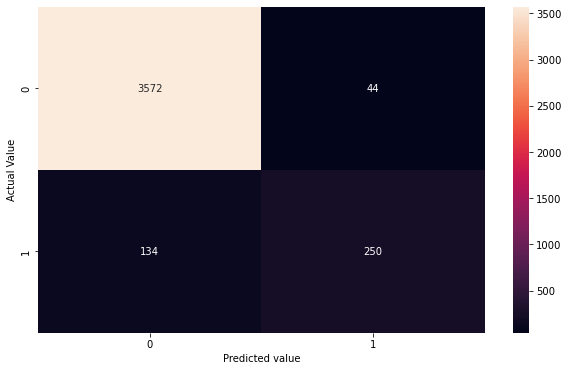

((   Accuracy    Recall  Precision  F1-score
  0    0.9555  0.651042    0.85034  0.737463,),)

In [59]:
# To check the model training performance

df_train4 = model_performance_classification(logreg21, x_train_scaler, y_train)

df_train4

**Observation**

- The model behaves exactly the same way as the logistic model without tuning its parameters in training performance
- The regulation strength "C" did not imrove the training performance.

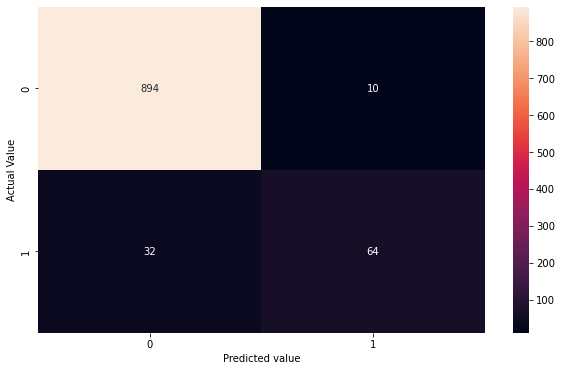

((   Accuracy    Recall  Precision  F1-score
  0     0.958  0.666667   0.864865  0.752941,),)

In [60]:
# To check the model testing performance

df_test4 = model_performance_classification(logreg21, x_test_scaler, y_test)

df_test4

**Observations**

- The model behaves the same way as the logistic regression model without tunning parameters in test performance.
- The regularisation strength "C" did not improve the test performance.

# To compute the ROC-AUC Curve

In [61]:
# To obtain the predicted probabilities

proba_train = logreg.predict_proba(x_train_scaler)[:, 1]

In [62]:
# To compute the AUC score

auc_train = roc_auc_score(y_train, proba_train)

auc_train

0.9619623144819321

**Interpretation**

- The AUC score of 0.96196 means that, 96% of the time the model will correctly distinguish between the liabiliby customers 
who will accept the personal loan offer and those who will not.

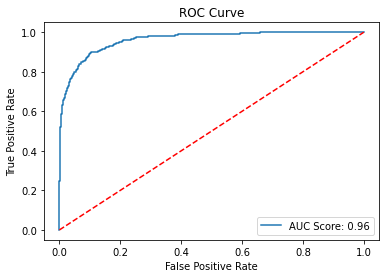

In [63]:
# To obtain the ROC curve

fpr, tpr, threshold = roc_curve(y_train, proba_train)

plt.plot(fpr, tpr, label = f"AUC Score: {auc_train:.2f}")
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc = "best")
plt.show()

In [64]:
# To get the threshold with the maximum difference between the fpr and tpr

opt_index = np.argmax(tpr - fpr)

opt_index

210

In [65]:
# To get the threshold at this index


opt_thresh = threshold[opt_index]

opt_thresh

0.10612258227237656

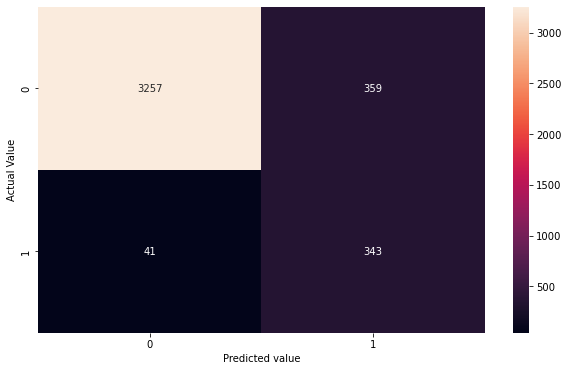

((   Accuracy    Recall  Precision  F1-score
  0       0.9  0.893229   0.488604  0.631676,),)

In [66]:
# Using this threshold to check the performance of the training data

df_train_auc = model_performance_classification(logreg, x_train_scaler, y_train, threshold = opt_thresh)

df_train_auc

**Observations**

- This model minimizes the False Negative to 41 from 134 in the logistic regression model for training performance. 
Hence, the improvement in the recall score to 89%.
- This means that the model wrongly classified that, 41 customers did not accept the loan offer but they did.
- The model did badly in the False Positive side, hence the reduction in the precision score to 48.8%
- The model wrongly classified 359 customers that they did accept the offer but they did not.

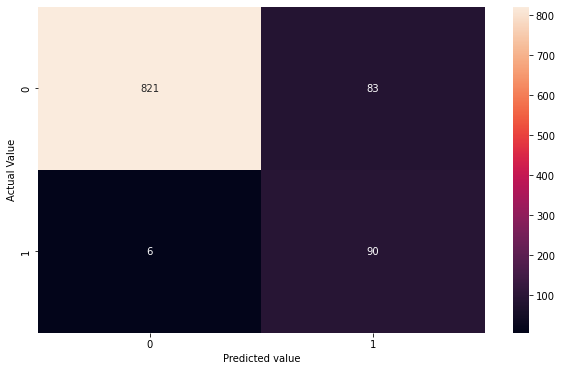

((   Accuracy  Recall  Precision  F1-score
  0     0.911  0.9375   0.520231  0.669145,),)

In [67]:
# Using this threshold to check the performance of the testing data

df_test_auc = model_performance_classification(logreg, x_test_scaler, y_test, threshold =opt_thresh)

df_test_auc

**Observations**

- This model minimizes the False Negative to 6 from 32 in the logistic regression model for the test performance. 
Hence, the improvement in the recall score to 93.8%.
- This means that the model wrongly classified that, 6 customers did not accept the loan offer but they did.
- The model did badly in the False Positive side, hence the reduction in the precision score to 52%
- The model wrongly classified 83 customers that they did accept the personal loan offer but they did not.

## To improve the balance between recall and precision scores

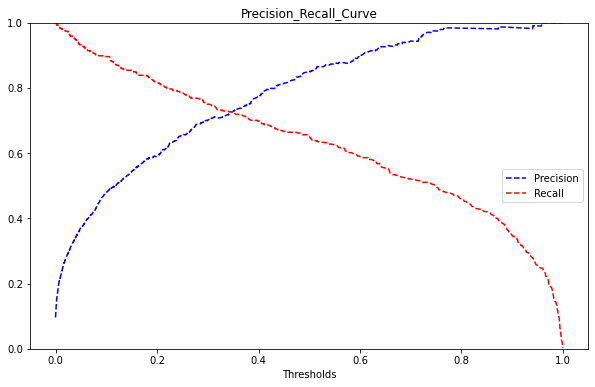

In [68]:
# To plot the precision and recall curves

pre, rec, thres = precision_recall_curve(y_train, proba_train)

plt.figure(figsize=(10,6))
plt.plot(thres, pre[ :-1], "b--", label ="Precision")
plt.plot(thres, rec[ :-1], "r--", label ="Recall")
plt.ylim([0,1])
plt.legend(loc= "best")
plt.title("Precision_Recall_Curve")
plt.xlabel("Thresholds")
plt.show()


**From the plot above**

- The precision curve and the recall curve are balanced at threshold = 0.348

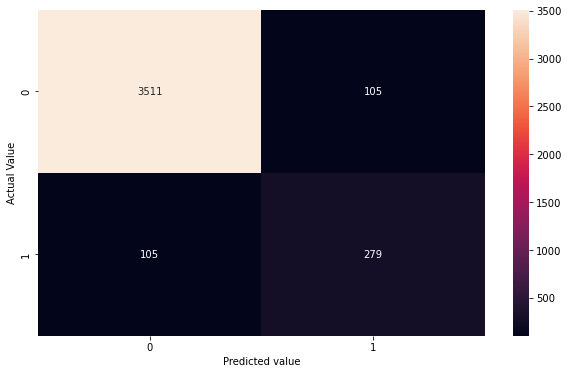

((   Accuracy    Recall  Precision  F1-score
  0    0.9475  0.726562   0.726562  0.726562,),)

In [69]:
# Using this threshold to check the performance of the training data

df_pre_rec_train = model_performance_classification(logreg, x_train_scaler, y_train, threshold = 0.348)

df_pre_rec_train

**Observations**

- This model balances the recall and the precision scores at 72.6%. 
- It improves the recall score to 73% from 65% in the logistic regression in the training performance.
- There is a reduction in the precision score to 73% from 85%
- The model wrongly classified 105 customers in the False Negative side as having rejected the loan offer but they accepted it.
- The model also classified wrongly 105 customers in the False Positive side that they did accept the offer but they did not.

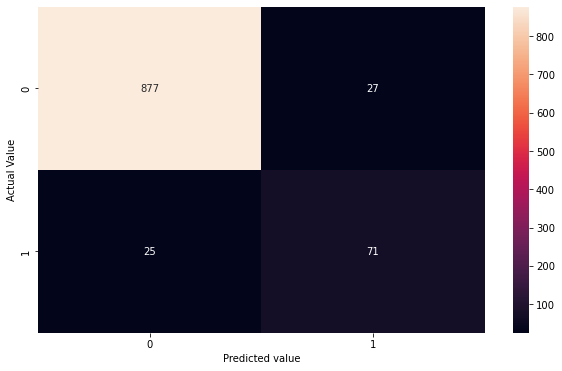

((   Accuracy    Recall  Precision  F1-score
  0     0.948  0.739583    0.72449  0.731959,),)

In [70]:
# Using this threshold to check the performance of the training data

df_pre_rec_test = model_performance_classification(logreg, x_test_scaler, y_test, threshold =0.348)

df_pre_rec_test

**Observations**

- It improves the recall score to 73% from 66.7% in the logistic regression in the test performance.
- There is a reduction in the precision score to 72% from 86.5%
- The model wrongly classified 25 customers in the False Negative side as having rejected the loan offer but they accepted it.
- The model also classified wrongly 27 customers in the False Positive side that they did accept the offer but they did not.

# Decision Tree model

In [71]:
# Libraries to help build the model

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [72]:
# To create an instant of the decision tree classifier

clf = DecisionTreeClassifier(random_state =0)

# To train the model

clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

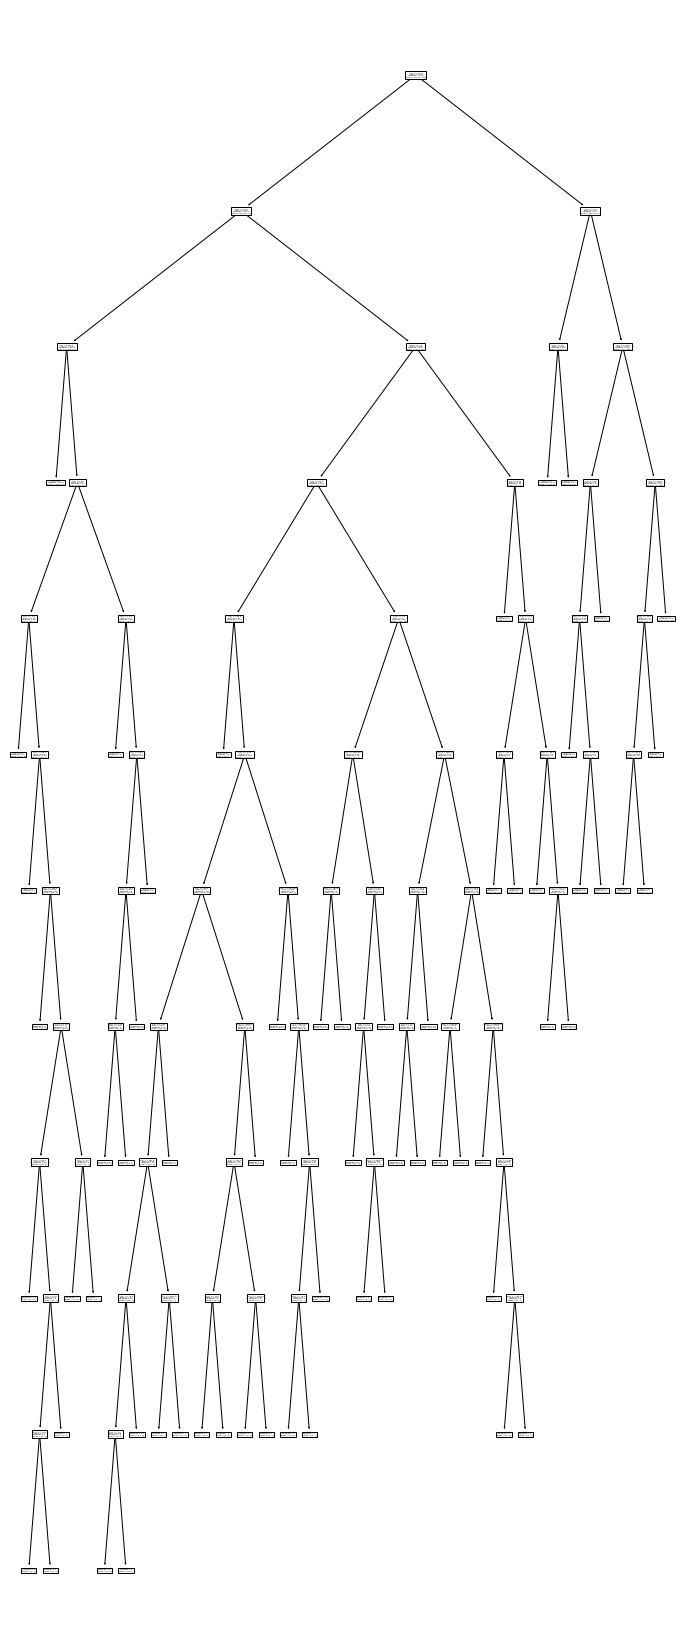

In [73]:
# To show the fully built-tree

plt.figure(figsize=(12,30))
tree.plot_tree(clf)
plt.show()

# To check the model training performance

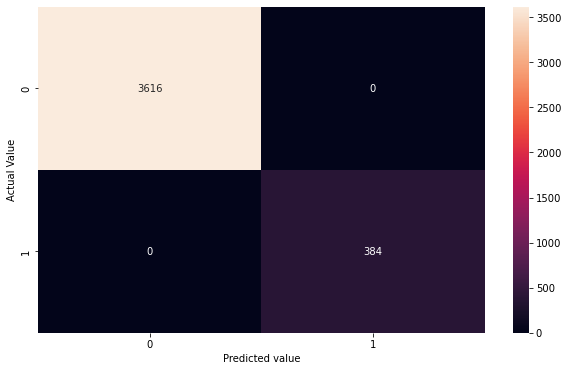

((   Accuracy  Recall  Precision  F1-score
  0       1.0     1.0        1.0       1.0,),)

In [74]:
# To check the performance of the training data

df_tree_train = model_performance_classification(clf, x_train, y_train)

df_tree_train

# To check the model testing performance

**Observation**

- The model performance is 100% in all metrics, hence depicts a perfect model performance which is unrealistic.

### Conclusion

- The model over-fits.

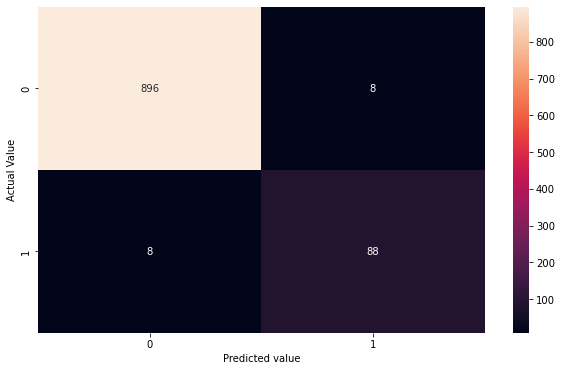

((   Accuracy    Recall  Precision  F1-score
  0     0.984  0.916667   0.916667  0.916667,),)

In [75]:
# To check the performance of the testing data

df_tree_test = model_performance_classification(clf, x_test, y_test)

df_tree_test

**Observations**

- The model wrongly classified 8 customers in the False Negative side that they did not accept the offer but they did.
- The model also classified wrongly 8 customers in the False Positive side that they did accept the offer but they did not.
- The model shows improvement in its metrics performances when compared with the unrealistic 100% performances its training data. 

### Conclusion

- The training performance is higher than the model's test performance. Therefore, this model over-fits.

# To improve the decision tree model

In [76]:
# To use parameter "class_weight" to improve the model performance 


clfA = DecisionTreeClassifier(class_weight={0:0.25, 1:0.75}, random_state=0)


**Hints**

-Giving 75% to the class 1 of customers that accept personal loan offer and 25% to class 0 since the objective is to increase
the customers that will accept the offer

In [77]:
# To train the model

clfA.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.25, 1: 0.75}, random_state=0)

# To check the model training performance

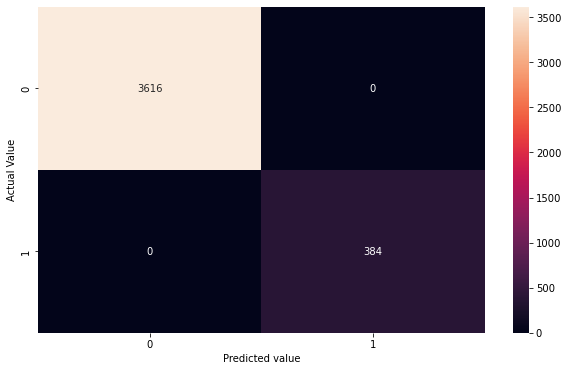

((   Accuracy  Recall  Precision  F1-score
  0       1.0     1.0        1.0       1.0,),)

In [78]:
# To check the imporved performance of the training data

df_tree_train2 = model_performance_classification(clfA, x_train, y_train)

df_tree_train2

**Observation**

- The model still depicts 100% metrics performances and thus, it is over-fitting

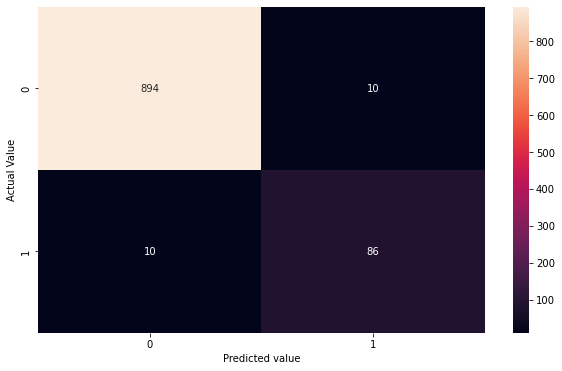

((   Accuracy    Recall  Precision  F1-score
  0      0.98  0.895833   0.895833  0.895833,),)

In [79]:
# To check the imporved performance of the training data

df_tree_test2 = model_performance_classification(clfA, x_test, y_test)

df_tree_test2

**Observations**

- The model wrongly classified 10 customers in the False Negative side that they did not accept the offer but they did.
- The model also classified wrongly 10 customers in the False Positive side that they did accept the offer but they did not.
- The model shows improvement in its metrics performances when compared with the unrealistic 100% performances its training data.
The model still over-fits despite this improvement.

# Applying prunning strategy to improve the model

In [80]:
# Setting the tree maximum depth to 4 in another model

clfB = DecisionTreeClassifier(random_state=0, max_depth= 4)

In [81]:
# To build the model

clfB.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

# To check the model training performance

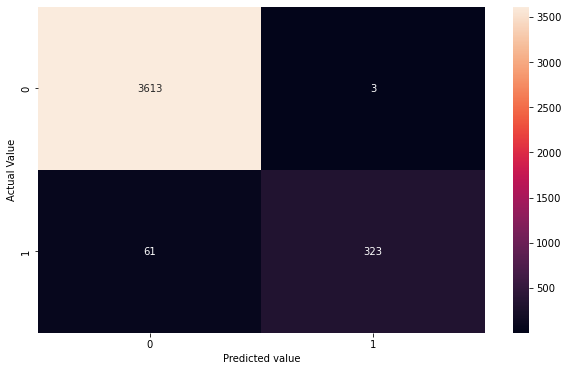

((   Accuracy    Recall  Precision  F1-score
  0     0.984  0.841146   0.990798  0.909859,),)

In [82]:
# To check the imporved performance of the training data

df_tree_train3 = model_performance_classification(clfB, x_train, y_train)

df_tree_train3

**Observations**

- The model wrongly classified 61 customers in the False Negative side that they did not accept the offer but they did.
This reduces the recall score to 84%.
- The model also classified wrongly 3 customers in the False Positive side that they did accept the offer but they did not.
Hence, the precison score is 99%.
- Though the accuracy and precision scores are still high, the model shows improvement from the unrealistic 100% performances in its training data when it was fully built up.

# To check the model testing performance

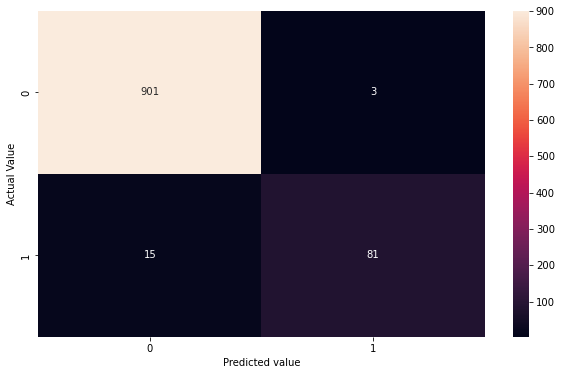

((   Accuracy   Recall  Precision  F1-score
  0     0.982  0.84375   0.964286       0.9,),)

In [83]:
# To check the model testing performance

df_tree_test3 = model_performance_classification(clfB, x_test, y_test)

df_tree_test3

**Observations**

- This model wrongly classified 15 customers in the False Negative side that they did not accept the offer but they did.
- The model also classified wrongly 3 customers in the False Positive side that they did accept the offer but they did not.

### Conclusion

- The model shows improvement and it can be said to generalize well.

# To know the important Features Used by this Model

In [84]:
# To know the important values of the variables the model used

clfB.feature_importances_

array([0.        , 0.        , 0.        , 0.34403878, 0.        ,
       0.16261551, 0.05205738, 0.42052739, 0.        , 0.        ,
       0.02076094, 0.        , 0.        ])

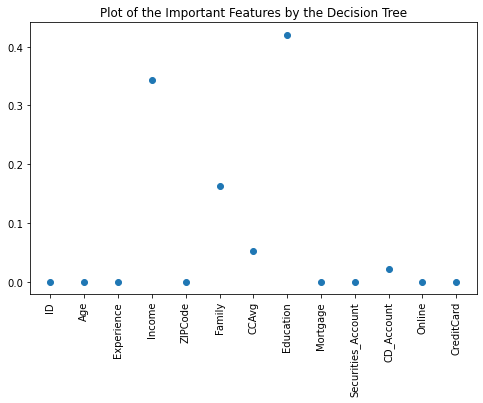

In [85]:
# To show these variables in a plot

plt.figure(figsize=(8, 5))
plt.plot(clfB.feature_importances_, "o")
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.title("Plot of the Important Features by the Decision Tree")
plt.show()

**Observations**

- The decision tree model sees "Education" as the most important variable which means the customer's level of education will most determine if he is eligible for the personal loan offer or not
- Income variable is the second most important feature to the model
- Family and CCAvg variables come third and fourth in terms of importance to the model
- Other variables are considered as unimportant by the decision tree model

## Recommendation

- The important variables above should be focussed on, going forward.

# Using SMOTE to correct the data imbalance in both classes

In [86]:
# Library to help import SMOTE 

from imblearn.over_sampling import SMOTE

In [87]:
# To instantiate SMOTE

smote = SMOTE(random_state = 0)

# To resample the data

X_sm, y_sm = smote.fit_resample(X,y)

# To split the data

x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.2, random_state =0, stratify =y_sm)

In [88]:
# To check the distribution of the target 

y_sm.value_counts()

0    4520
1    4520
Name: Personal_Loan, dtype: int64

**Note**

- The two classes (customers that accepted the loan offer and those who did not) have been resampled to match

# Random Forest Model Building Using Imbalanced Data

In [89]:
# Li brary to help build the model

from sklearn.ensemble import RandomForestClassifier

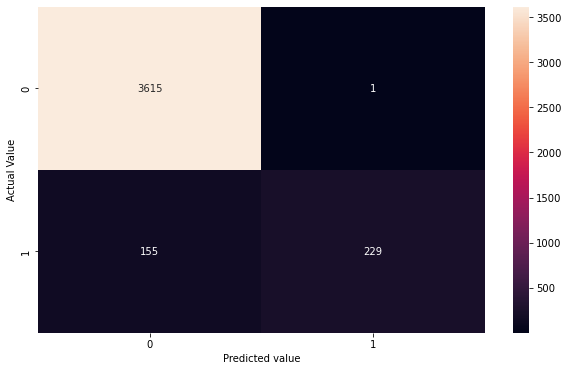

((   Accuracy    Recall  Precision  F1-score
  0     0.961  0.596354   0.995652  0.745928,),)

In [90]:
# To create an instant of the model

rfc = RandomForestClassifier(random_state=0, max_depth=4)

# To train the model

rfc.fit(x_train, y_train)

# To check the performance of the training data

model_performance_classification(rfc, x_train, y_train)

**Observations**

- The model wrongly classified 155 customers in the False Negative side that they did not accept the offer but they did. Hence,
the 59.6% in the recall score.
- The model also classified wrongly 1 customer in the False Positive side that they did accept the offer but they did not.
hence the 99% precision score.

### Conclusion

- The model improves greatly the precision score when comapared to the logistic regression model in the training data

### To check the test data performance

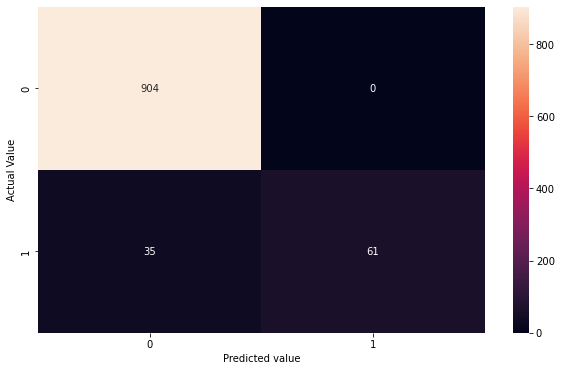

((   Accuracy    Recall  Precision  F1-score
  0     0.965  0.635417        1.0   0.77707,),)

In [91]:
# To check the performance of the testing data


model_performance_classification(rfc, x_test, y_test)

**Observations**

- The model wrongly classified 35 customers in the False Negative side that they did not accept the offer but they did. Hence,
the 63.5% in the recall score.
- The precision score is 100% which means the model makes 100% correct prediction.

### Conclusion

- The model improves the precision score when comapared to the logistic regression model in the test data.

# Random Forest Model Building Using Balanced Data

In [92]:
# To create an instant of the model

rfcA = RandomForestClassifier(random_state=0, max_depth=4)

# To train the model

rfcA.fit(x_train_sm, y_train_sm)


RandomForestClassifier(max_depth=4, random_state=0)

# To check the performance of the training data

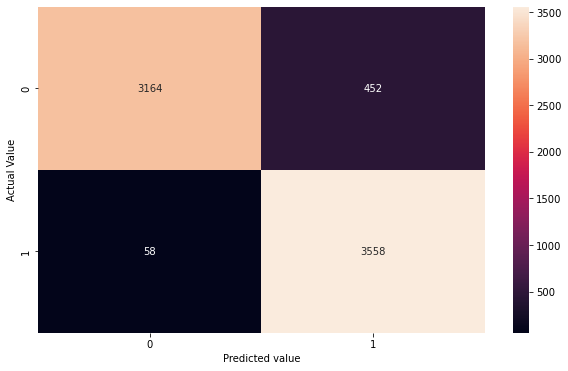

((   Accuracy   Recall  Precision  F1-score
  0   0.92948  0.98396   0.887282  0.933124,),)

In [93]:
# To check the performance of the training data

model_performance_classification(rfcA, x_train_sm, y_train_sm)

**Observations**

- The model wrongly classified 58 customers in the False Negative side that they did not accept the offer but they did. Hence,
the 98% in the recall score.
- The model also classified wrongly 452 customers in the False Positive side that they did accept the offer but they did not.
hence the 88.7% precision score.

# To check the testing data performance

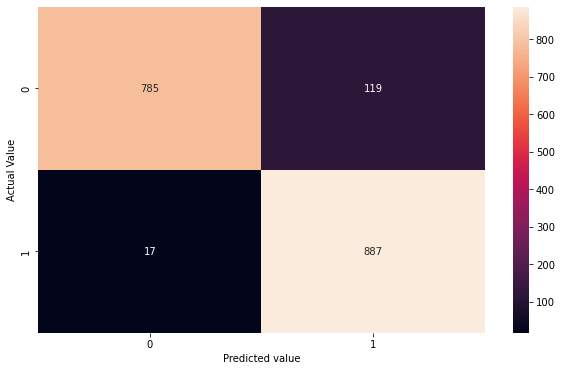

((   Accuracy    Recall  Precision  F1-score
  0  0.924779  0.981195    0.88171  0.928796,),)

In [94]:
# To check the performance of the testing data

model_performance_classification(rfcA, x_test_sm, y_test_sm)

**Observations**

- The model wrongly classified 17 customers in the False Negative side that they did not accept the offer but they did. Hence,
the 98% in the recall score.
- The model also classified wrongly 119 customers in the False Positive side that they did accept the offer but they did not.
hence the 88% precision score.

### Conclusion

- The model generalizes well on both the test and training data. Owing to the synthetic data used, this model's performances 
maybe be unreliable in the real world scenerio.

# To know the important features used by the random forest model

In [95]:
# To know the important values of the variables the random forest model used

rfcA.feature_importances_

array([0.00203552, 0.00353113, 0.00432554, 0.53775929, 0.00340663,
       0.02908912, 0.28046811, 0.04736608, 0.02499061, 0.00546927,
       0.01008525, 0.01614752, 0.03532592])

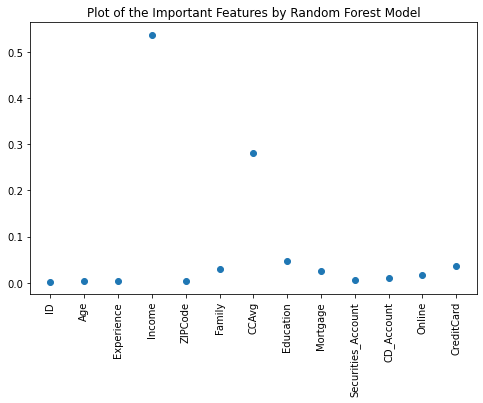

In [96]:
# To show these variables in a plot

plt.figure(figsize=(8, 5))
plt.plot(rfcA.feature_importances_, "o")
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.title("Plot of the Important Features by Random Forest Model")
plt.show()

**Observations**

- Income variable is adjudged the most important by the random forest model, which means the annual income of the customer
will most determine if he will be eligible for the personal loan offer.
- The second most important variable is average spending on the credit card; CCAvg.
- Little importance to the Education, CreditCard, Mortgage and family variables.
- Other variables are not important.


# Gradient Boosting Model Using the Imbalanced Data

In [97]:
# Library to help build the model

from sklearn.ensemble import GradientBoostingClassifier

In [98]:
# To instantiate the model 

gb = GradientBoostingClassifier(random_state=0)

# To build the model

gb.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

# To check the performance of the training data

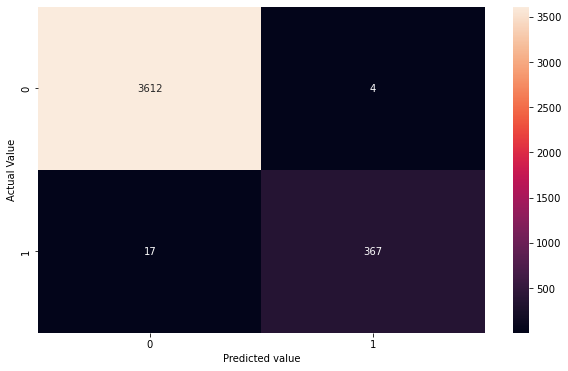

((   Accuracy    Recall  Precision  F1-score
  0   0.99475  0.955729   0.989218  0.972185,),)

In [99]:
# To check the performance of the training data

model_performance_classification(gb, x_train, y_train)

**Observations**

- The model wrongly classified 17 customers in the False Negative side that they did not accept the offer but they did. Hence,
the 95.6% in the recall score.
- The model also classified wrongly 4 customers in the False Positive side that they did accept the offer but they did not.
hence the 98.9% precision score.


# To check the performance of the test data

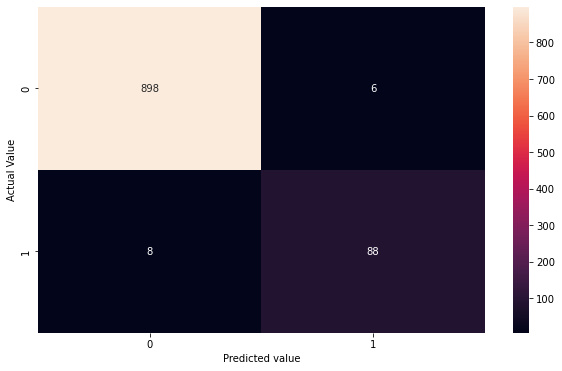

((   Accuracy    Recall  Precision  F1-score
  0     0.986  0.916667    0.93617  0.926316,),)

In [100]:
# To check the performance of the testing data

model_performance_classification(gb, x_test, y_test)

**Observations**

- The model wrongly classified 8 customers in the False Negative side that they did not accept the offer but they did. Hence,
the 91.7% in the recall score.
- The model also classified wrongly 6 customers in the False Positive side that they did accept the offer but they did not.
hence the 93.6% precision score.

### Conclusion

- The model can be said to generalize well.

# Gradient Boosting Model Using the Balanced Data

In [101]:
# To instantiate the model 

gbc = GradientBoostingClassifier(random_state=0)

# To build the model

gbc.fit(x_train_sm, y_train_sm)

GradientBoostingClassifier(random_state=0)

# To check the model training performance

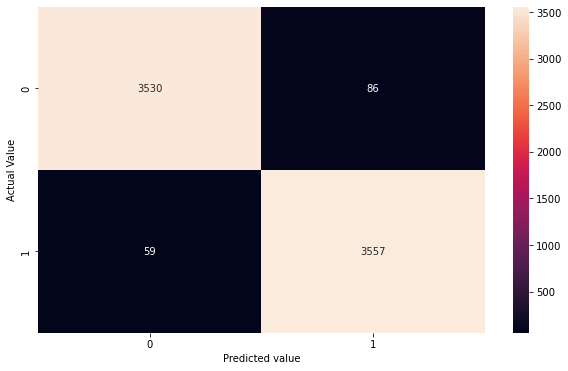

((   Accuracy    Recall  Precision  F1-score
  0   0.97995  0.983684   0.976393  0.980025,),)

In [102]:
# To check the performance of the training data

model_performance_classification(gbc, x_train_sm, y_train_sm)

**Observations**

- The model wrongly classified 59 customers in the False Negative side that they did not accept the offer but they did. Hence,
the 98.3% in the recall score.
- The model also classified wrongly 86 customers in the False Positive side that they did accept the offer but they did not.
hence the 97.6% precision score.

# To check the performance of the test data

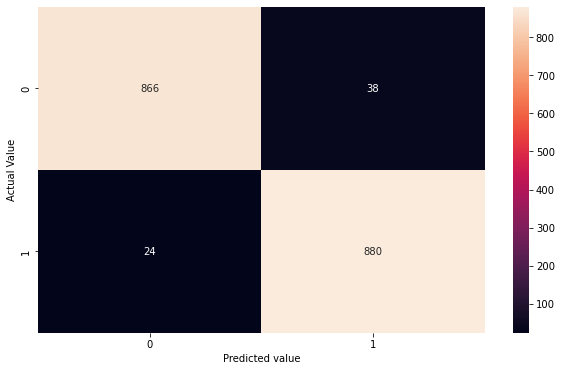

((   Accuracy    Recall  Precision  F1-score
  0  0.965708  0.973451   0.958606  0.965971,),)

In [103]:
# To check the performance of the testing data

model_performance_classification(gbc, x_test_sm, y_test_sm)

**Observations**

- The model wrongly classified 24 customers in the False Negative side that they did not accept the offer but they did. Hence,
the 97.3% in the recall score.
- The model also classified wrongly 38 customers in the False Positive side that they did accept the offer but they did not.
hence the 95.9% precision score.

### Conclusion

- The model generalizes well on both test and training data but the synthetic data used makes it unrealiable for real world use.

## Tuning the Parameter of the Gradient Boosting model Manually Using imbalanced data

In [104]:
# To instantiate the model, setting the learning rate to 0.2

gbc1 = GradientBoostingClassifier(random_state=0,learning_rate=0.2)

# To build the model

gbc1.fit(x_train_sm, y_train_sm)

GradientBoostingClassifier(learning_rate=0.2, random_state=0)

# To check the training data performance

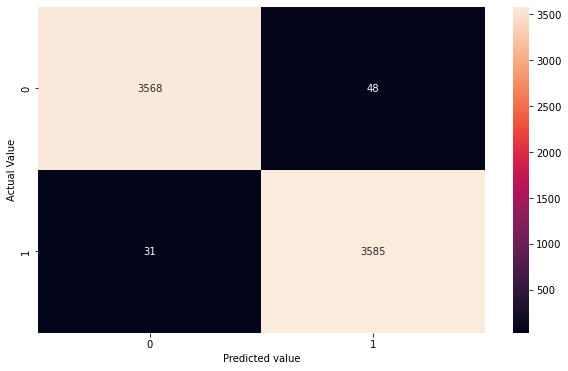

((   Accuracy    Recall  Precision  F1-score
  0  0.989076  0.991427   0.986788  0.989102,),)

In [105]:
# To check the performance of the training data

model_performance_classification(gbc1, x_train_sm, y_train_sm)

**Observations**

- The model wrongly classified 31 customers in the False Negative side that they did not accept the offer but they did. Hence,
the 99% in the recall score.
- The model also classified wrongly 48 customers in the False Positive side that they did accept the offer but they did not.
hence the 98.7% precision score.

# To check the performance of the test data

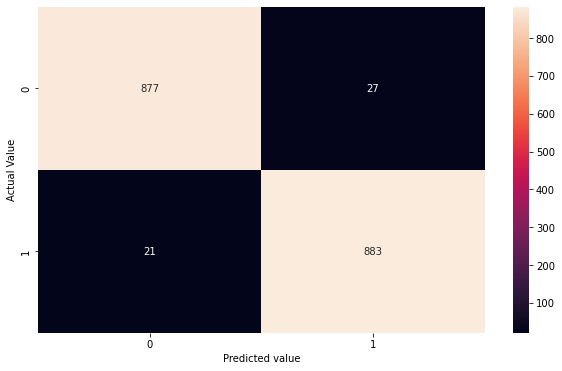

((   Accuracy   Recall  Precision  F1-score
  0  0.973451  0.97677    0.97033  0.973539,),)

In [106]:
# To check the performance of the testing data

model_performance_classification(gbc1, x_test_sm, y_test_sm)

**Observations**

- The model wrongly classified 21 customers in the False Negative side that they did not accept the offer but they did. Hence,
the 97.7% in the recall score.
- The model also classified wrongly 27 customers in the False Positive side that they did accept the offer but they did not.
hence the 97% precision score.

### Conclusion

- The model generalizes well.

# To know the important features used by the gradient boosting model

In [107]:
# To know the important values of the variables the gradient boosting model used

gbc.feature_importances_

array([0.00190649, 0.00218786, 0.001122  , 0.7459375 , 0.00216679,
       0.08001875, 0.07168121, 0.08201984, 0.00441335, 0.00079952,
       0.00138865, 0.00154997, 0.00480808])

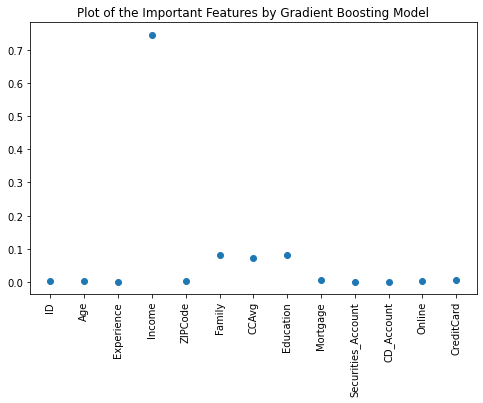

In [108]:
# To show these variables in a plot

plt.figure(figsize=(8, 5))
plt.plot(gbc.feature_importances_, "o")
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.title("Plot of the Important Features by Gradient Boosting Model")
plt.show()

**Observations**

- Income variable is the most important as adjudged by the gradient boosting model
- Little importance attached to the Family, CCAvg and Education variables
- Others are not adjudged important by this model

# Hyper-parameters Tuning for Gradient Boosting Model

In [109]:
# Library to help with the randomized search model and estimator

from sklearn.model_selection import RandomizedSearchCV

In [110]:
# To know the parameters in this model

gb.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [111]:
# To set the parameters to tune

param_grid ={'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 'max_depth':[3,4,5,6,7,8],'max_features':[5,6,7,8,9,10,11,12,13]}

In [112]:
# To instantiate the models

gb =GradientBoostingClassifier(random_state=0)
grid = RandomizedSearchCV(gb, param_grid, cv=5, n_jobs= -1, scoring = "recall")

In [113]:
# To fit the gridsearch on the training data

grid.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'max_features': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13]},
                   scoring='recall')

In [114]:
# To get the best parameters

grid.best_params_

{'max_features': 11, 'max_depth': 4, 'learning_rate': 0.2}

In [115]:
# To get the best recall score

grid.best_score_

0.9062542720437458

In [122]:
# To use the best parameters to rebuild the model

gb =GradientBoostingClassifier(random_state=0, learning_rate=0.2, max_depth=4, max_features=11)

In [123]:
# To fit the model

gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, max_features=11,
                           random_state=0)

In [124]:
# To make prediction on the test data

y_pred = gb.predict(x_test)

In [125]:
# To check the recall score for the test data

recall_score(y_test, y_pred)

0.9270833333333334

**Interpretations**

- With the hyperparameters tunning of the gradient boosting model with the learning rate of 0.2, maximum depth of 4 and using
11 features, the recall score of 90.6% on the training data and 90.6% on the test data were achieved.
- 90.6% recall score on the training data means that from the target, the model predicted 92.6% correctly the liability
customers that will accept the personal loan offer.
- 92.7% recall score on the test data means that from the target, the model predicted 92.7% correctly the liability
customers that will accept the personal loan offer.


# General Recommendations

- Education, Income, Family and CCAvg variables are adjudged important by all models for the target. Focus should be on these
variables.
- Since all their customers are educated, personal loan campaign should be run to encorage educational pursuit.
- With all their customers' varied years of education, only 1% of them have deposit account, 10% have securities accounts and 
30% with credit card. Campaign should be run to encourage fixed investment in deposit account and shares or stocks in 
securities account. These accounts can then serve as securities in the future to get loan from the bank. This will also
impact the credit-card portfolio positively as these accounts will enhance the credit worthiness of these customers which will,
in turn, increase the loan portfolio and overall enhance the bottomline.
- To maximize precision, random forest and gradient boosting models' precision scores for imbalanced data should be adopted.
- To maximum recall, gradient boosting model's recall score for imbalanced data should be adopted. Also, decision tree model
with pre-prunning strategy can be adopted as it also shows significant improvement in the recall score.
- The precision-recall curve model can be adopted if the strategy is to achieve balance between the two.